# Heuristica SAM

Acá se realizará una heuristica que capture el problema de la empresa SAM, este es un problema de reparto de productos, considerando un vehículo con una carga limitada y ventanas de tiempo para cada cliente. Este será resuelto por un algoritmo greedy considerando una clusterización de K-means

# Librerias

In [2]:
import googlemaps
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.cluster
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import networkx as nx
import sys
import random
import itertools
import copy
import time

# Lectura de Datos

In [3]:
tiempos = np.load('distancia.npy').astype(int)
distancias = np.load('tiempos.npy').astype(int)
coordenadas=np.load('coordenadas.npy')
vehiculos=4
productos=2
capacidad=3
volumen=0.024
abren=[0 for i in range(len(coordenadas))]
cierre=[480 for i in range(len(coordenadas))]
servicio=[20 for i in range(len(coordenadas))]
demanda=[(1,2) for i in range(len(coordenadas))]

In [4]:
coordenadas

array([[-33.6316638, -70.7103613],
       [-33.6316638, -70.7103613],
       [-33.633671 , -70.7092268],
       [-33.5990142, -70.7053702],
       [-33.5034955, -70.7383777],
       [-33.3662205, -70.6784764],
       [-33.3891362, -70.6182044],
       [-33.424301 , -70.6534809],
       [-33.4488897, -70.6692655],
       [-33.5264495, -70.6613511],
       [-33.5384435, -70.6637835],
       [-33.5384435, -70.6637835],
       [-33.5384435, -70.6637835],
       [-33.5384435, -70.6637835],
       [-33.4453173, -70.6506813],
       [-33.5107421, -70.6064993],
       [-33.5107421, -70.6064993],
       [-33.5194969, -70.6009383],
       [-33.5107421, -70.6064993],
       [-33.5194969, -70.6009383],
       [-33.5186331, -70.5995848],
       [-33.521776 , -70.58357  ],
       [-33.4390523, -70.5730136],
       [-33.4457823, -70.5718992],
       [-33.4524377, -70.5694704],
       [-33.390873 , -70.546284 ],
       [-33.4398191, -70.6530179],
       [-33.413517 , -70.5832512],
       [-33.4283651,

In [700]:
print("tiempos= ",tiempos)
print("\n distancias= ", distancias)

tiempos=  [[9999999       0     410 ...    1706    1541    1726]
 [      0 9999999     410 ...    1706    1541    1726]
 [     84      84 9999999 ...    1790    1624    1809]
 ...
 [   1949    1949    1986 ... 9999999     488     214]
 [   1739    1739    1777 ...     414 9999999     276]
 [   1757    1757    1795 ...     308     314 9999999]]

 distancias=  [[9999999       0    3862 ...   38163   32619   35533]
 [      0 9999999    3862 ...   38163   32619   35533]
 [    642     642 9999999 ...   38805   33261   36176]
 ...
 [  40062   40062   40277 ... 9999999    3363    1412]
 [  34838   34838   35053 ...    2543 9999999    1374]
 [  36075   36075   36290 ...    2017    2173 9999999]]


# Clusterizacion de datos

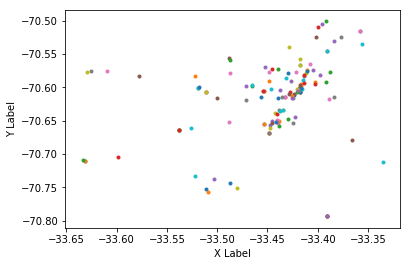

In [701]:
#Datos sin clusterizar
X=coordenadas
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

for i in range(len(coordenadas)):
    ax.scatter(X[i][0], X[i][1], marker='.')
plt.show()
fig.savefig('Puntos_Georef.png')

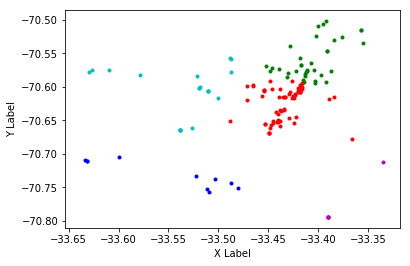

In [702]:
#Datos clusterizados
data=coordenadas
k_means = sklearn.cluster.KMeans(5)
clusters_kmeans=k_means.fit(data)
lebels_cluster_kmeans=clusters_kmeans.labels_
n_clusters_kmeans = lebels_cluster_kmeans.max()+1
cluster_centers_kmeans = clusters_kmeans.cluster_centers_


#Graficar clusters
X=data
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

labels1=lebels_cluster_kmeans

 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_kmeans), colors):
    my_members = labels1 == k
    cluster_center = cluster_centers_kmeans[k]
    ax.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='.')
plt.show()

In [703]:
puntos_cluster={}
for a in range(n_clusters_kmeans):
    puntos_cluster[a]=list(data[i] for i in range(len(data)) if lebels_cluster_kmeans[i]==a ) 

# Greedy

In [749]:
def greedy():
    tiempos = np.load('distancia.npy').astype(int)
    distancias = np.load('tiempos.npy').astype(int)
    coordenadas=np.load('coordenadas.npy')
    vehiculos=4
    productos=2
    capacidad=3
    volumen=0.024
    abren=[0 for i in range(len(coordenadas))]
    cierre=[480 for i in range(len(coordenadas))]
    servicio=[20 for i in range(len(coordenadas))]
    demanda=[(1,2) for i in range(len(coordenadas))]
    vehiculo=0
    capacidad=3
    FO=0
    distancias = np.load('tiempos.npy').astype(int)
    nodos_por_visitar=[i for i in range(len(coordenadas))]
    inicio=0
    nodos_por_visitar.remove(inicio)
    nodos_visitados=[]
    nodos_visitados.append(inicio)
    nodo_actual=np.argmin(distancias[inicio])
    distancia=np.min(distancias[inicio])
    FO+=distancia
    ruta_vehiculo={}
    ruta_vehiculo_iteracion=[]
    flag=0
    time=0
    while len(nodos_por_visitar)!=1:
        while capacidad>=0.09:
            try:
                a=nodo_actual
                nodos_por_visitar.remove(nodo_actual)
                for i in range(len(nodos_visitados)):
                    distancias[nodo_actual][nodos_visitados[i]]=999999
                nodos_visitados.append(nodo_actual)
                ruta_vehiculo_iteracion.append(nodo_actual)
                distancia=np.min(distancias[nodo_actual])
                FO+=distancia
                nodo_actual=np.argmin(distancias[nodo_actual])
                b=nodo_actual
                time+=(tiempos[a][b]/60)+20
                if (time/60)>400:
                    break
                capacidad-=0.072
            except:
                flag=1
                break
        if flag==1:
            break
#         print("tiempo usado "+str(time/60)+" capacidad usada "+str(3-capacidad))    
#         print("CAMBIO VEHICULO")    
        ruta_vehiculo[vehiculo]=ruta_vehiculo_iteracion
        vehiculo+=1
        time=0
        capacidad=3
        ruta_vehiculo_iteracion=[]

    nodos_visitados.append(nodo_actual)
    FO+=distancias[nodo_actual][0]
    nodos_visitados.append(0)
    for i in range(len(ruta_vehiculo)):
        ruta_vehiculo[i]=[0]+ruta_vehiculo[i]+[0]
    distancias = np.load('tiempos.npy').astype(int)
    FO=fitnes_diccionario(ruta_vehiculo)
#     print(FO)
    return(ruta_vehiculo)

In [746]:
ruta_vehiculo=greedy()
print(ruta_vehiculo)

418.521
{0: [0, 1, 2, 3, 10, 11, 12, 13, 9, 76, 75, 15, 16, 18, 17, 19, 20, 21, 46, 112, 45, 24, 23, 22, 30, 54, 49, 116, 111, 119, 114, 113, 115, 50, 121, 124, 117, 122, 60, 52, 53, 127, 0], 1: [0, 126, 51, 92, 105, 100, 99, 91, 101, 103, 89, 93, 88, 31, 90, 27, 96, 97, 108, 98, 106, 94, 133, 131, 134, 102, 132, 29, 34, 107, 35, 36, 109, 95, 33, 104, 32, 28, 118, 125, 55, 56, 0], 2: [0, 120, 57, 58, 59, 129, 47, 83, 48, 85, 14, 84, 71, 128, 8, 73, 77, 26, 81, 130, 86, 82, 7, 72, 74, 6, 87, 5, 69, 70, 61, 62, 63, 64, 38, 80, 4, 40, 41, 39, 37, 44, 0]}


# ILS VND

## Función calcula FO

In [705]:
def fitnes_diccionario(ruta_vehiculo):
    FO=0
    for i in range(len(ruta_vehiculo)):
        for j in range(len(ruta_vehiculo.get(i))-1):
            a=ruta_vehiculo.get(i)[j]
            b=ruta_vehiculo.get(i)[j+1]
            FO+=distancias[a][b]
    FO=FO/1000
    return(FO)

In [706]:
def fitnes_lista(lista):
    FO=0
    for i in range(len(lista)-1):
        a=lista[i]
        b=lista[i+1]
        FO+=distancias[a][b]
    FO=FO/1000
    return(FO)

## Funcion evaluadora de factibilidad

In [707]:
def factibilidad_lista(solucion):
    flag_tiempo=False
    flag_capacidad=False
    tiempo=0
    capacidad=0
    for i in range(len(solucion)-1):
        a=solucion[i]
        b=solucion[i+1]
        tiempo+=tiempos[a][b]
    capacidad+=len(solucion)*0.072
#     print("tiempo "+str(tiempo/60)+" capacidad "+str(capacidad))
    if (tiempo/60)>480: #si no se cumple la restriccion se activa el flag
        flag_tiempo=True
    if capacidad>3.3:
        flag_capacidad=True
    return(flag_tiempo,flag_capacidad)    

## Funcion para copiar diccionarios

In [708]:
def construir_copia_dic(diccionario_a_copiar):
    dic_copiado={}
    for i in range(len(diccionario_a_copiar)):
        dic_copiado[i]=[]
    for i in range(len(diccionario_a_copiar)):
        for j in range(len(diccionario_a_copiar.get(i))):
            dic_copiado[i].append(diccionario_a_copiar[i][j])
    return(dic_copiado)    

## Local Search en la misma ruta

In [737]:
def relocation_intra_ruta(ruta_vehiculo):
    #Genero una copia del diccionario y elementos para iterarlos
    copia_ruta=copy.deepcopy(ruta_vehiculo)
    id_vehiculo_1=random.randint(0,len(copia_ruta)-1)  
    vehiculo_1=copia_ruta.get(id_vehiculo_1)
    elemento_1=random.randint(1,len(vehiculo_1)-2)
    elemento_2=random.randint(1,len(vehiculo_1)-2)
    
    #Hago la iteracion de los elementos
    vehiculo_1[elemento_1], vehiculo_1[elemento_2] = vehiculo_1[elemento_2], vehiculo_1[elemento_1]
    flag_tiempo,flag_capacidad=factibilidad_lista(vehiculo_1)
    if flag_tiempo==False and flag_capacidad==False:
        #si hay una solucion factible evaluo los fitness
        dict_copia_temp=copy.deepcopy(ruta_vehiculo)
        dict_copia_temp[id_vehiculo_1]=vehiculo_1        
        FO_temporal=fitnes_diccionario(dict_copia_temp)
        FO_original=fitnes_diccionario(ruta_vehiculo)
        if FO_temporal<FO_original:
            #Actualizo solucion
#             print("funcion objetivo: ",FO_temporal,"en tiempo",time.time()-start)
            ruta_vehiculo=copy.deepcopy(dict_copia_temp)
        else:
            #si no mejora la solucion desago el cambio realizado
            vehiculo_1[elemento_1], vehiculo_1[elemento_2] = vehiculo_1[elemento_2], vehiculo_1[elemento_1]
            copia_ruta[id_vehiculo]=vehiculo_1
            ruta_vehiculo=copy.deepcopy(copia_ruta)
    else:
        #si no encuentro slcuon factible desago el cambio
        vehiculo_1[elemento_1], vehiculo_1[elemento_2] = vehiculo_1[elemento_2], vehiculo_1[elemento_1]
        copia_ruta[id_vehiculo]=vehiculo_1
        ruta_vehiculo=copy.deepcopy(copia_ruta)
    #preparo los datos para su salida    
    FO_inicial=fitnes_diccionario(ruta_vehiculo)
    FO_final=fitnes_diccionario(ruta_vehiculo)
    return(FO_final,ruta_vehiculo)


## Local search para inter rutas

In [738]:
#Aca inicia la funcion 
def relocation_inter_ruta(ruta_vehiculo):
    #Genero una copia para poder trabajar con el diccionario sin perderlo
    copia_ruta=copy.deepcopy(ruta_vehiculo)
    #selecciono vehiculos y elementos aleatorios para iterarlos
    id_vehiculo_1=random.randint(0,len(copia_ruta)-1)
    id_vehiculo_2=random.randint(0,len(copia_ruta)-1)    
    vehiculo_1=copia_ruta.get(id_vehiculo_1)
    vehiculo_2=copia_ruta.get(id_vehiculo_2)
    elemento_1=random.randint(1,len(vehiculo_1)-2)
    elemento_2=random.randint(1,len(vehiculo_2)-2)
    #hago el cambio de elementos entre las rutas
    vehiculo_1[elemento_1], vehiculo_2[elemento_2] = vehiculo_2[elemento_2], vehiculo_1[elemento_1]
    #reviso su factibilidad
    flag_tiempo_1,flag_capacidad_1=factibilidad_lista(vehiculo_1)
    flag_tiempo_2,flag_capacidad_2=factibilidad_lista(vehiculo_2)

    if flag_tiempo_1==False and flag_capacidad_1==False and flag_tiempo_2==False and flag_capacidad_2==False:
        #Si es factible genero una copia para evaluar su fiteness
        dict_copia_temp=copy.deepcopy(ruta_vehiculo)
        dict_copia_temp[id_vehiculo_1]=vehiculo_1
        dict_copia_temp[id_vehiculo_2]=vehiculo_2
        FO_temporal=fitnes_diccionario(dict_copia_temp)
        FO_original=fitnes_diccionario(ruta_vehiculo)
        if FO_temporal<FO_original:
            #si me mejora la solucion, actualizo la solucion anterior
            ruta_vehiculo=copy.deepcopy(dict_copia_temp)
#             print("Funcion objetivo",FO_temporal,"en tiempo",time.time()-start)
        else:
            #en caso de que no mejore desago el cambio
            vehiculo_1[elemento_1], vehiculo_2[elemento_2] = vehiculo_2[elemento_2], vehiculo_1[elemento_1]
            ruta_vehiculo[id_vehiculo_1]=vehiculo_1
            ruta_vehiculo[id_vehiculo_2]=vehiculo_2
    else:
        vehiculo_1[elemento_1], vehiculo_2[elemento_2] = vehiculo_2[elemento_2], vehiculo_1[elemento_1]
        
    #En caso de que no haya una solucion factible, desago el cambio y si hay preparo los parametros para su salida    
    FO=fitnes_diccionario(ruta_vehiculo)
    
    ruta_vehiculo[id_vehiculo_1]=vehiculo_1
    ruta_vehiculo[id_vehiculo_2]=vehiculo_2
    FO=fitnes_diccionario(ruta_vehiculo)
    return(FO,ruta_vehiculo)            

## Funcion Local Search para relocation

In [711]:
def relocation(ruta_vehiculo,FO,inter,intra):
    if inter==1:
        FO,ruta_vehiculo=relocation_inter_ruta(ruta_vehiculo)
    
    elif intra==1:
        FO,ruta_vehiculo=relocation_intra_ruta(ruta_vehiculo)    
    
    return(ruta_vehiculo,FO)        

## MAIN

In [751]:
FO_final=[]
tiempo_final=[]
for j in range(50):
    ruta_vehiculo=greedy()
    import time
    start=time.time()
    i=0
    #Exploro el primer vecindario, inter rutas
    while i<10000:
        ruta_vehiculo,FO=relocation(ruta_vehiculo,FO,1,0)
        i+=1
    i=0
    #Exploro el segundo vecindario, intra rutas
    while i<10000:
        ruta_vehiculo,FO=relocation(ruta_vehiculo,FO,0,1)
        i+=1
    end=time.time()    
    # print("ruta vehiculo terminando las iteraciones= ",ruta_vehiculo,"\n")
    # print(FO,"\n")
    termino=(end-start)
    FO_final.append(FO)
    tiempo_final.append(termino)
    print("Tiempo de ejecución= ",termino," funcion objetivo= ",FO," Iteracion= ", j)

Tiempo de ejecución=  16.34827423095703  funcion objetivo=  342.519  Iteracion=  0
Tiempo de ejecución=  15.146158456802368  funcion objetivo=  344.293  Iteracion=  1
Tiempo de ejecución=  15.338184595108032  funcion objetivo=  346.426  Iteracion=  2
Tiempo de ejecución=  15.47738242149353  funcion objetivo=  360.85  Iteracion=  3
Tiempo de ejecución=  15.25621771812439  funcion objetivo=  341.358  Iteracion=  4
Tiempo de ejecución=  15.15504789352417  funcion objetivo=  342.115  Iteracion=  5
Tiempo de ejecución=  15.291088581085205  funcion objetivo=  346.288  Iteracion=  6
Tiempo de ejecución=  15.283130168914795  funcion objetivo=  341.171  Iteracion=  7
Tiempo de ejecución=  15.198357343673706  funcion objetivo=  361.547  Iteracion=  8
Tiempo de ejecución=  16.4653582572937  funcion objetivo=  350.138  Iteracion=  9
Tiempo de ejecución=  18.61261010169983  funcion objetivo=  361.534  Iteracion=  10
Tiempo de ejecución=  15.573871850967407  funcion objetivo=  347.557  Iteracion=  1

In [770]:
print(ruta_vehiculo)

{0: [0, 2, 1, 3, 10, 11, 12, 13, 9, 76, 75, 15, 16, 18, 17, 19, 20, 21, 46, 45, 112, 24, 23, 22, 118, 54, 49, 116, 111, 119, 125, 113, 122, 50, 121, 124, 117, 115, 127, 60, 52, 53, 0], 1: [0, 126, 51, 92, 105, 100, 99, 91, 101, 89, 103, 93, 88, 31, 90, 27, 96, 97, 108, 98, 106, 94, 133, 131, 134, 102, 132, 29, 107, 34, 109, 36, 35, 32, 104, 33, 95, 28, 30, 57, 55, 120, 0], 2: [0, 2, 1, 3, 10, 11, 12, 13, 9, 76, 75, 15, 16, 18, 17, 19, 20, 21, 46, 45, 112, 24, 23, 22, 118, 54, 49, 116, 111, 119, 125, 113, 122, 50, 121, 124, 117, 115, 127, 60, 52, 53, 0]}


In [759]:
iteraciones=[i for i in range(50)]


In [769]:
porcentaje_final=[]
for i in range(50):
    porcentaje=100-((FO_final[i]*100)/418)
    porcentaje_final.append(porcentaje)
print(sum(porcentaje_final)/50)    

15.86103349282297


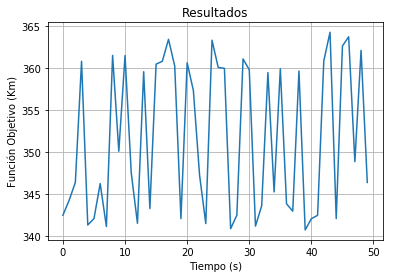

In [764]:
fig, ax = plt.subplots()
ax.plot(iteraciones,FO_final)

ax.set(xlabel='Tiempo (s)', ylabel='Función Objetivo (Km)',
       title='Resultados')
ax.grid()

fig.savefig("FOfinal.png")
plt.show()

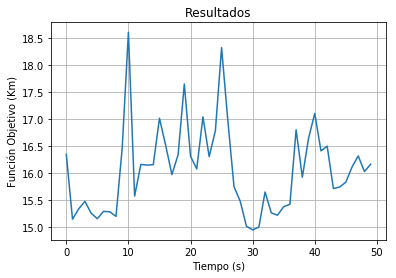

In [763]:
fig, ax = plt.subplots()
ax.plot(iteraciones,tiempo_final)

ax.set(xlabel='Tiempo (s)', ylabel='Función Objetivo (Km)',
       title='Resultados')
ax.grid()

fig.savefig("tiempofinal.png")
plt.show()

In [752]:
x=[418.52, 417.28, 415.85, 415.63, 413.32, 413.31, 413.01, 411.89, 411.29, 411.38, 411.18, 410.97, 410.02, 409.39, 372.37, 371.58, 369.51, 368.01, 366.04, 344.78, 344.78,344.78]

In [753]:
y=[0.082,0.195,0.319,0.352,1.196,1.345,1.426,2.02,2.533,2.596,3.035,3.88,5.394,6.557,7.798,7.87,7.955,8.1434,8.445,10.41,14.449,14.865]

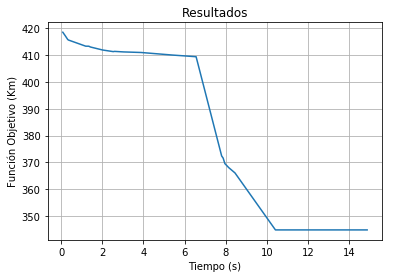

In [754]:
fig, ax = plt.subplots()
ax.plot(y, x)

ax.set(xlabel='Tiempo (s)', ylabel='Función Objetivo (Km)',
       title='Resultados')
ax.grid()

fig.savefig("test.png")
plt.show()